In [1]:
pip list

Package                           Version
--------------------------------- ------------------
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyascii    

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 10000

# Generate data
age = np.random.randint(18, 70, size=n_samples)
income = np.random.normal(loc=50000, scale=15000, size=n_samples)
children = np.random.randint(0, 5, size=n_samples)
gender = np.random.choice(['Male', 'Female'], size=n_samples)
occupation = np.random.choice(['Engineer', 'Doctor', 'Teacher', 'Artist', 'Other'], size=n_samples)
city = np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], size=n_samples)
start_date = datetime(2020, 1, 1)
dates = [start_date + timedelta(days=np.random.randint(0, 365)) for _ in range(n_samples)]
owns_car = np.random.choice([True, False], size=n_samples)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Children': children,
    'Gender': gender,
    'Occupation': occupation,
    'City': city,
    'Date_joined': dates,  # Add the Date_joined column
    'Owns_car': owns_car
})

# Save the DataFrame to a CSV file
file_path = 'synthetic_large_data_with_dates.csv'
data.to_csv(file_path, index=False)
print(f"Dataset with Date_joined saved to {file_path}")

Dataset with Date_joined saved to synthetic_large_data_with_dates.csv


In [4]:
#Data Summarisation 
data=pd.read_csv(file_path)
print("Sample Data:\n",data.head())
print("\nData Information:")
print(data.info())
print("\nBasic Statistics:\n",data.describe(include='all'))


Sample Data:
    Age        Income  Children  Gender Occupation         City Date_joined  \
0   56  37214.198509         0    Male     Artist      Phoenix  2020-06-18   
1   69  57130.484160         0    Male   Engineer      Phoenix  2020-09-26   
2   46  59486.813250         1  Female   Engineer      Houston  2020-11-02   
3   32  42887.327373         4    Male   Engineer  Los Angeles  2020-12-29   
4   60  38423.420639         2  Female     Doctor  Los Angeles  2020-02-18   

   Owns_car  
0      True  
1      True  
2      True  
3      True  
4     False  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          10000 non-null  int64  
 1   Income       10000 non-null  float64
 2   Children     10000 non-null  int64  
 3   Gender       10000 non-null  object 
 4   Occupation   10000 non-null  object 
 5   City    

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Print missing values before handling
print("\nMissing values before handling:\n", data.isnull().sum())

# Select numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Fill missing values in numerical columns with the median
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].median())

# Fill missing values in categorical columns with the mode
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Convert date column to datetime format
data['Date_joined'] = pd.to_datetime(data['Date_joined'])

# Perform one-hot encoding on categorical columns
encoded_data = pd.get_dummies(data, drop_first=True)

# Separate numerical columns for scaling
scaled_numerical_columns = [col for col in encoded_data.columns if col in numerical_columns]

# Scale numerical features
scaler = StandardScaler()
encoded_data[scaled_numerical_columns] = scaler.fit_transform(encoded_data[scaled_numerical_columns])

# Print the first few rows of the processed data
print("\nData after handling missing values, encoding, and scaling:\n", encoded_data.head())


Missing values before handling:
 Age            0
Income         0
Children       0
Gender         0
Occupation     0
City           0
Date_joined    0
Owns_car       0
dtype: int64

Data after handling missing values, encoding, and scaling:
         Age    Income  Children Date_joined  Owns_car  Gender_Male  \
0  0.835671 -0.848295 -1.450774  2020-06-18      True         True   
1  1.707517  0.473379 -1.450774  2020-09-26      True         True   
2  0.165020  0.629748 -0.745042  2020-11-02      True        False   
3 -0.773891 -0.471818  1.372155  2020-12-29      True         True   
4  1.103931 -0.768050 -0.039309  2020-02-18     False        False   

   Occupation_Doctor  Occupation_Engineer  Occupation_Other  \
0              False                False             False   
1              False                 True             False   
2              False                 True             False   
3              False                 True             False   
4               True

In [6]:
summary_stats=encoded_data.describe()
print("\n Summary Statistics:\n", summary_stats)

correlation_matrix= encoded_data.corr()
print("\n Correlation Matrix:\n", correlation_matrix)


 Summary Statistics:
                 Age        Income      Children                    Date_joined
count  1.000000e+04  1.000000e+04  1.000000e+04                          10000
mean  -4.227729e-17 -3.112177e-16  9.823253e-17  2020-07-02 08:10:45.120000256
min   -1.712802e+00 -3.904254e+00 -1.450774e+00            2020-01-01 00:00:00
25%   -8.409558e-01 -6.685054e-01 -7.450417e-01            2020-04-02 00:00:00
50%   -3.617490e-02 -2.648408e-03 -3.930929e-02            2020-07-04 00:00:00
75%    8.356711e-01  6.737207e-01  6.664231e-01            2020-10-02 00:00:00
max    1.707517e+00  3.513088e+00  1.372155e+00            2020-12-30 00:00:00
std    1.000050e+00  1.000050e+00  1.000050e+00                            NaN

 Correlation Matrix:
                           Age    Income  Children  Date_joined  Owns_car  \
Age                  1.000000 -0.004087  0.003439     0.010126  0.015023   
Income              -0.004087  1.000000 -0.016989    -0.006916 -0.002925   
Children       

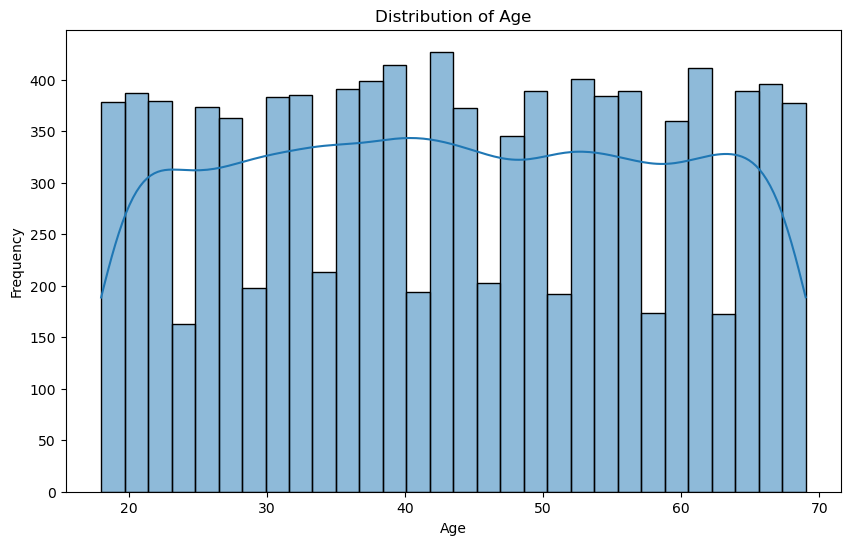

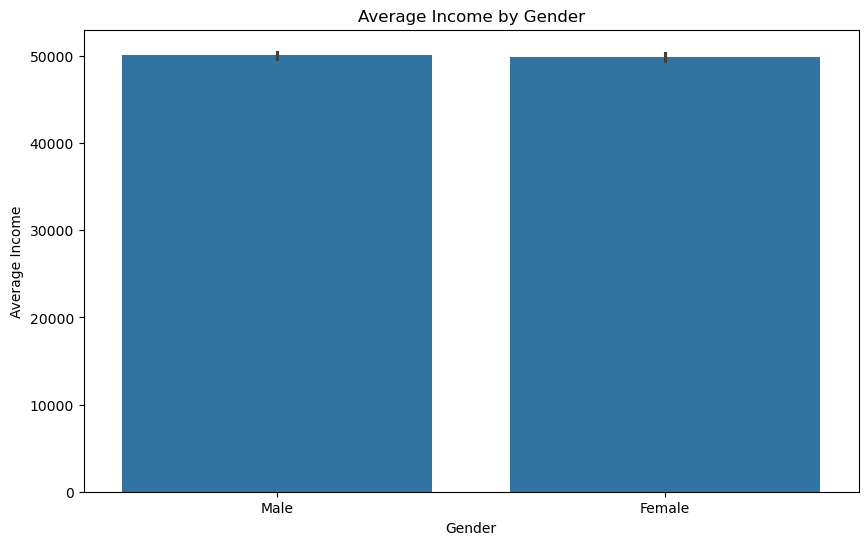

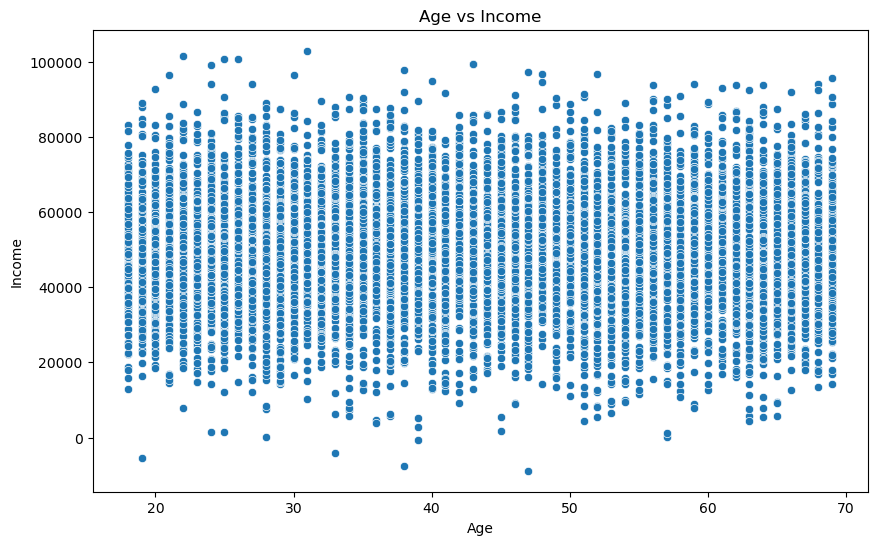

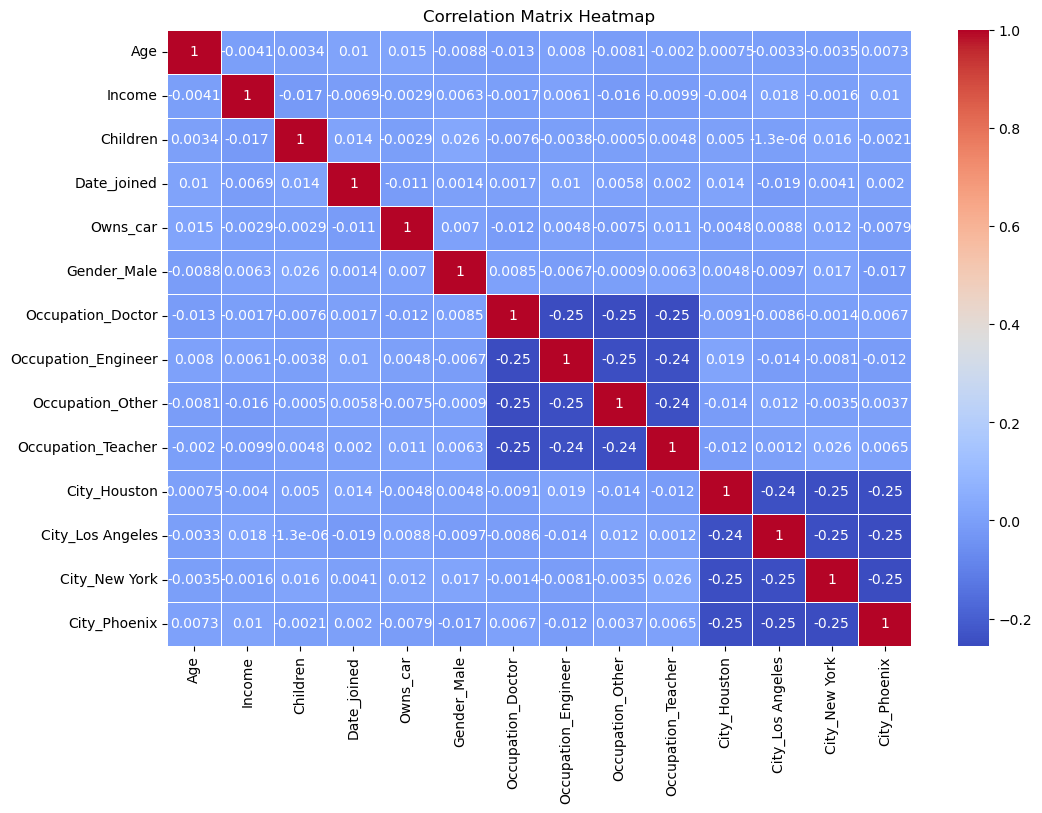

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Income', data=data)
plt.title('Average Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Income')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Income', data=data)
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

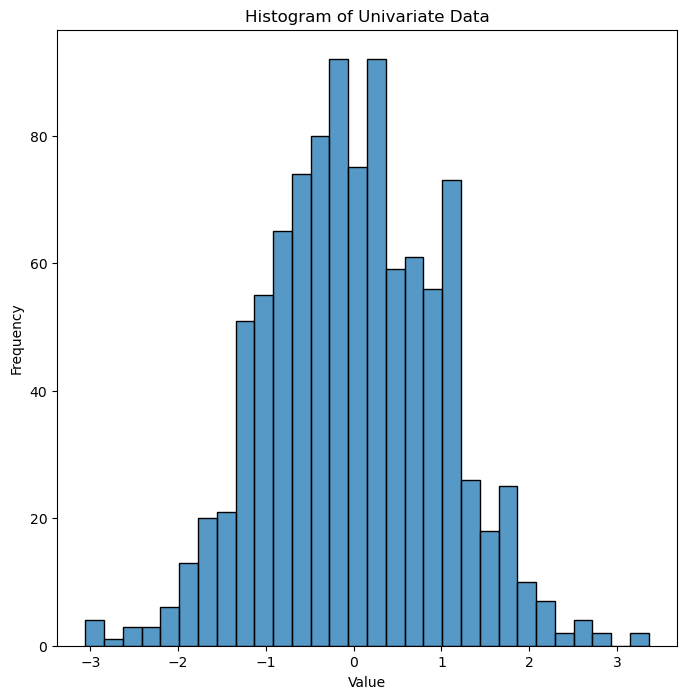

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=np.random.normal(0,1,1000)
plt.figure(figsize=(8,8))
sns.histplot(data, bins=30)
plt.title('Histogram of Univariate Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

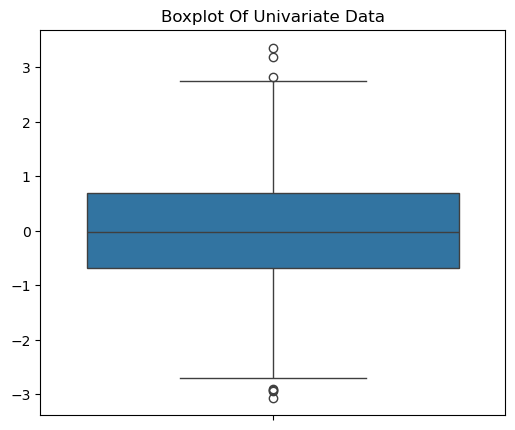

In [9]:
plt.figure(figsize=(6,5))
sns.boxplot(data=data)
plt.title('Boxplot Of Univariate Data')
plt.show()

In [10]:
import pandas as pd 

df=pd.DataFrame(data, columns=['Value'])

print(df.describe())

             Value
count  1000.000000
mean      0.002731
std       0.983254
min      -3.059026
25%      -0.673250
50%      -0.012027
75%       0.702244
max       3.362750


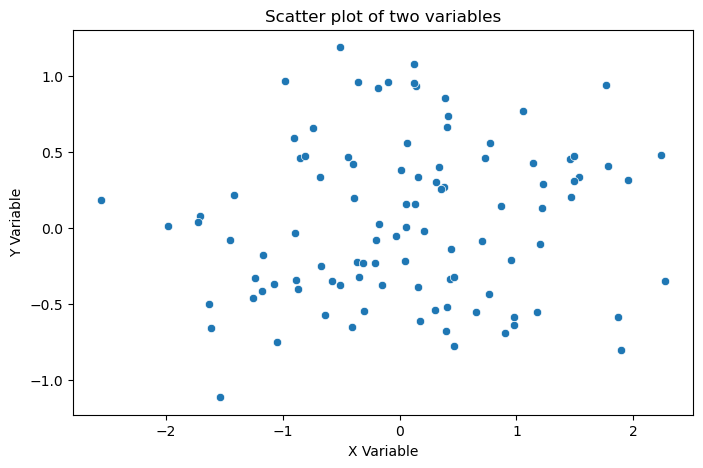

In [11]:
np.random.seed(0)
x=np.random.randn(100)
y=np.random.randn(100)*0.5

plt.figure(figsize=(8,5))
sns.scatterplot(x=x, y=y)
plt.title('Scatter plot of two variables')
plt.xlabel('X Variable')
plt.ylabel('Y Variable')
plt.show()

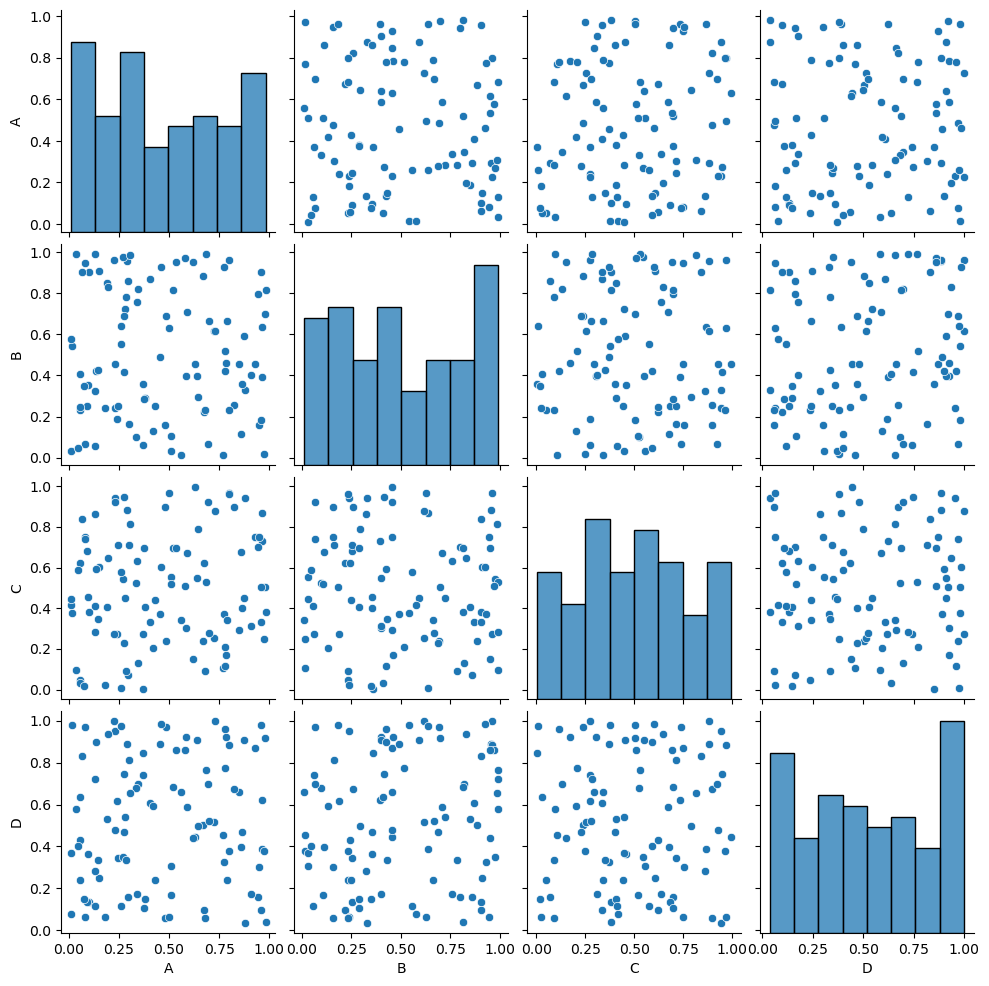

In [12]:
df=pd.DataFrame(
    {
        'A':np.random.rand(100),
        'B':np.random.rand(100),
        'C':np.random.rand(100),
        'D':np.random.rand(100)
        
    }
)

sns.pairplot(df)
plt.show()

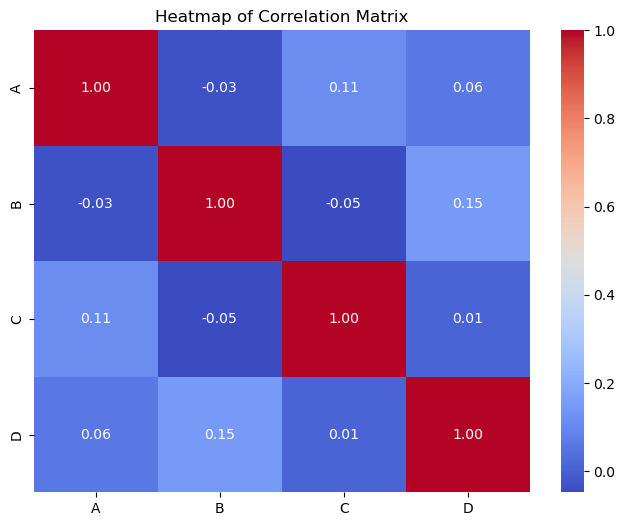

In [13]:
corr=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [14]:
print(df.corr())

          A         B         C         D
A  1.000000 -0.031433  0.113993  0.060751
B -0.031433  1.000000 -0.047514  0.151166
C  0.113993 -0.047514  1.000000  0.012431
D  0.060751  0.151166  0.012431  1.000000


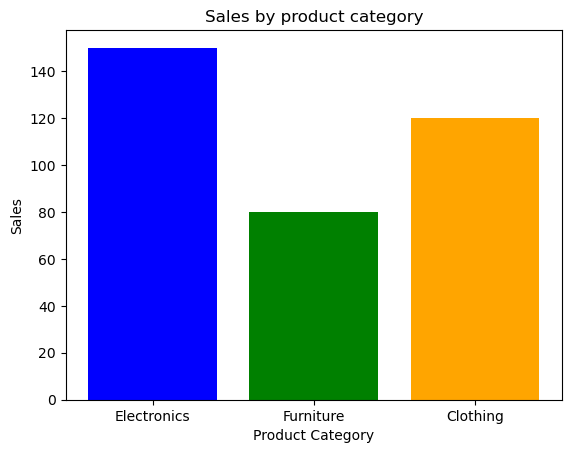

In [15]:
import matplotlib.pyplot as plt

categories=['Electronics','Furniture', 'Clothing']
sales=[150,80,120]

plt.bar(categories, sales, color=['blue','green', 'orange'])
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Sales by product category')
plt.show()

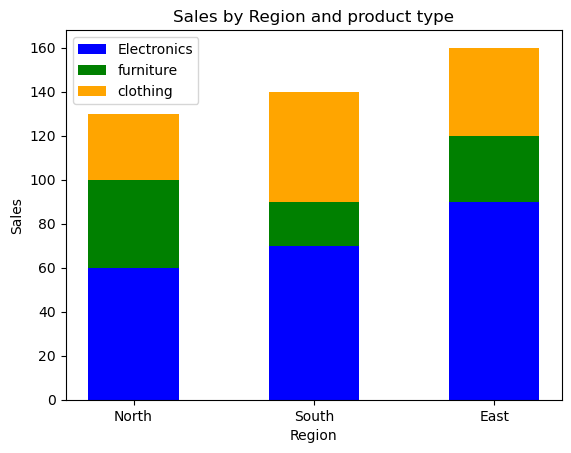

In [16]:
import numpy as np

regions=['North','South', 'East']
electronics=[60,70,90]
furniture=[40,20,30]
clothing=[30,50,40]

bar_width=0.5
index=np.arange(len(regions))

plt.bar(index, electronics, bar_width, label='Electronics', color='Blue')
plt.bar(index, furniture, bar_width, bottom=electronics, label= 'furniture', color='green')
plt.bar(index, clothing, bar_width, bottom=np.array(electronics)+np.array(furniture), label= 'clothing', color='orange')

plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales by Region and product type')
plt.xticks(index,regions)
plt.legend()
plt.show()


In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


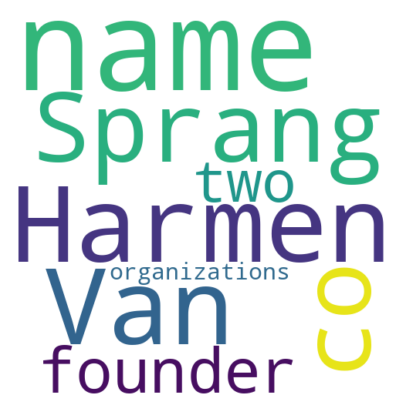

In [18]:
from wordcloud import WordCloud

text="My name is Harmen Van Sprang and I'm the co-founder of two organizations."
wordcloud=WordCloud(width=500,height=500,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


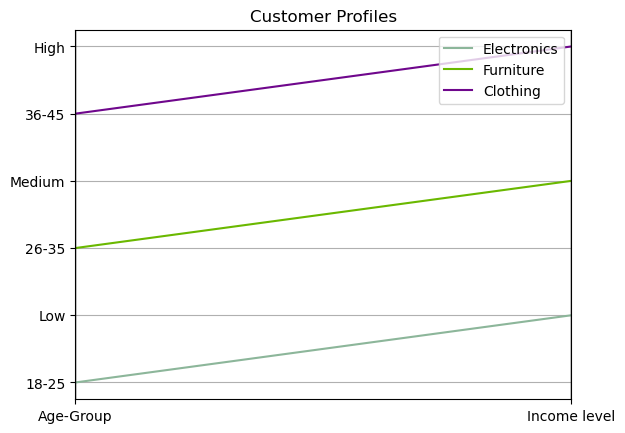

In [19]:
from pandas.plotting import parallel_coordinates
data=pd.DataFrame({
    'Age-Group':['18-25', '26-35', '36-45'],
    'Income level':['Low', 'Medium', 'High'],
    'Product Preference':['Electronics', 'Furniture','Clothing']
})


parallel_coordinates(data, 'Product Preference')
plt.title('Customer Profiles')
plt.show()

In [20]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


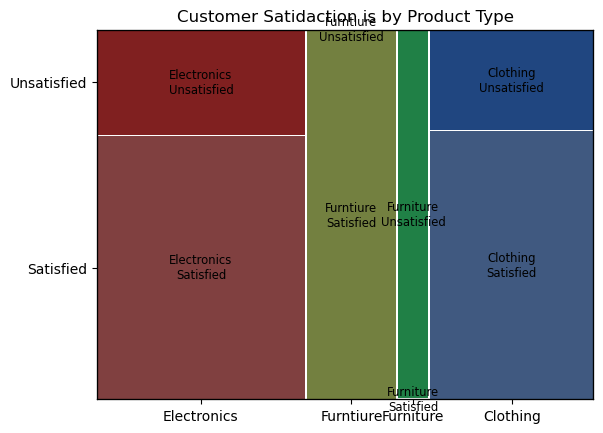

In [21]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

data={
    ('Electronics','Satisfied'):50,
    ('Electronics','Unsatisfied'):20,
    ('Furntiure','Satisfied'):30,
    ('Furniture','Unsatisfied'):10,
    ('Clothing','Satisfied'):40,
    ('Clothing','Unsatisfied'):15
}

mosaic(data,title='Customer Satidaction is by Product Type')
plt.show()

In [22]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


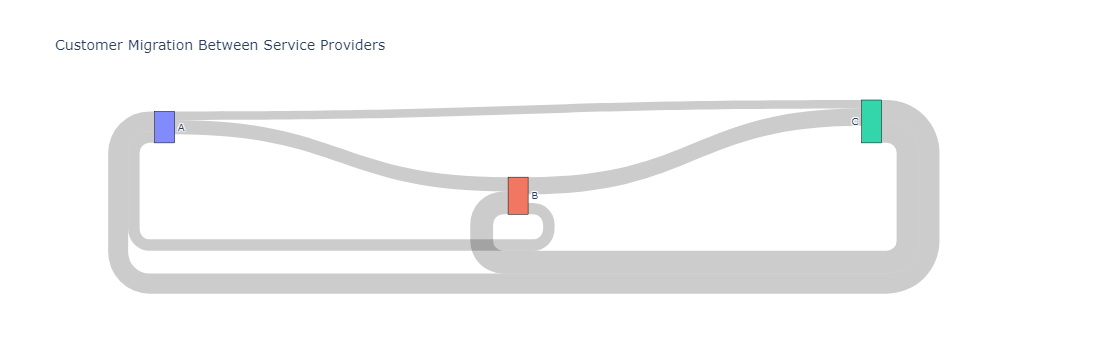

In [23]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

labels = ["A","B","C"]
source = [0,0,1,1,2,2]
target = [1,2,0,2,0,1]
values = [5,3,4,6,7,8]

fig = go.Figure(go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color="black", width=0.5),
        label=labels
    ),
    link = dict(
        source=source,
        target=target,
        value=values
    )))

fig.update_layout(title_text="Customer Migration Between Service Providers", font_size=10)
iplot(fig)

In [24]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

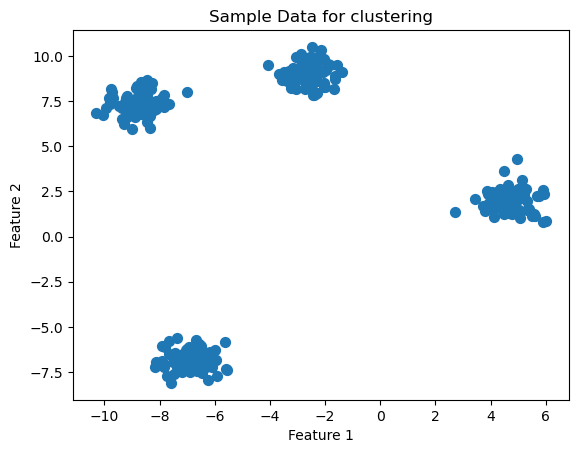

In [26]:
x,y=make_blobs(n_samples=300,centers=4, cluster_std=0.60, random_state=42)

plt.scatter(x[:,0], x[:,1], s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Sample Data for clustering')
plt.show()

In [27]:
kmeans= KMeans(n_clusters=4, random_state=42)
kmeans.fit(x)

centroids=kmeans.cluster_centers_

labels=kmeans.labels_

C:\Users\A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



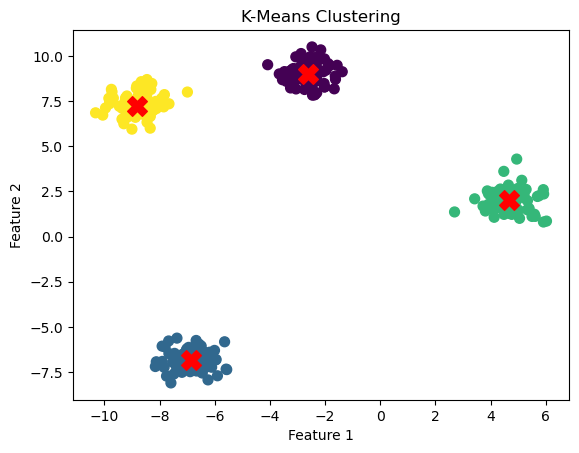

In [28]:
plt.scatter(x[:,0], x[:,1],c=labels, s=50,cmap='viridis')

plt.scatter(centroids[:,0], centroids[:,1], s=200, c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [29]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


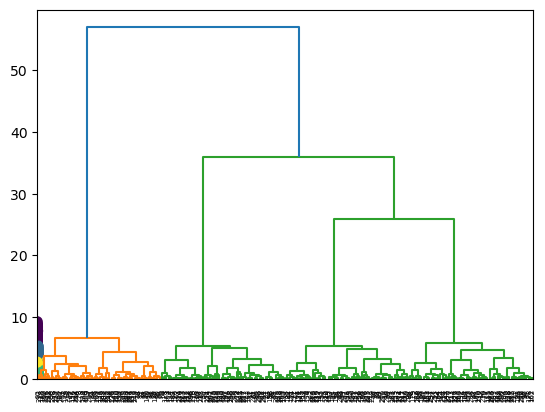

In [30]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

x,y= make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))

hc=AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc=hc.fit_predict(x)

plt.scatter(x[:,0], x[:,1], s=50, c=y_hc, cmap='viridis')
plt.show()

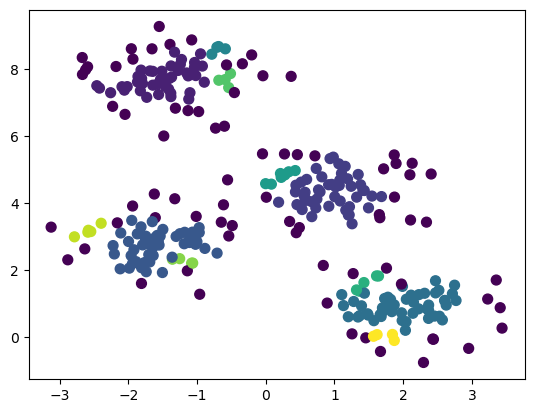

In [31]:
from sklearn.cluster import DBSCAN
x,y= make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

dbscan=DBSCAN(eps=0.3, min_samples=5)

y_dbscan=dbscan.fit_predict(x)
plt.scatter(x[:,0], x[:,1], s=50, c=y_dbscan, cmap='viridis')
plt.show()